In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def lennard_jones_potential(r, sigma: float, eps: float) -> np.ndarray:
    buf = (sigma / r)**6
    return 4 * eps * (buf * buf - buf)

def lennard_jones_potential_truncated(r: np.ndarray, sigma: float, eps: float) -> np.ndarray:
    rc = 2.5*sigma
    result = lennard_jones_potential(r, sigma, eps) - lennard_jones_potential(np.array([rc]), sigma, eps)
    result[r > rc] = 0
    return result

def lennard_jones_force(r, sigma: float, eps: float) -> np.ndarray:
    return 24*eps*np.power(sigma, 6)/np.power(r, 7) - 48*eps*np.power(sigma, 12)/np.power(r, 13)

In [4]:
def draw_plot_lj(x, y, ax):
    plot = sns.lineplot(
        x=x,
        y=y,
        ax=ax,
    )
    plot.set_ylim(-1.5, 2.5)
    plot.axhline(y=0, color='grey')

def draw_plot_ljr(x, y, ax, sigma):
    plot = sns.lineplot(
        x=x,
        y=y,
        ax=ax,
    )
    plot.set_ylim(-0.1, 0.1)
    plot.axhline(y=0, color='grey')
    plot.axvline(x=2.5*sigma, color='grey')

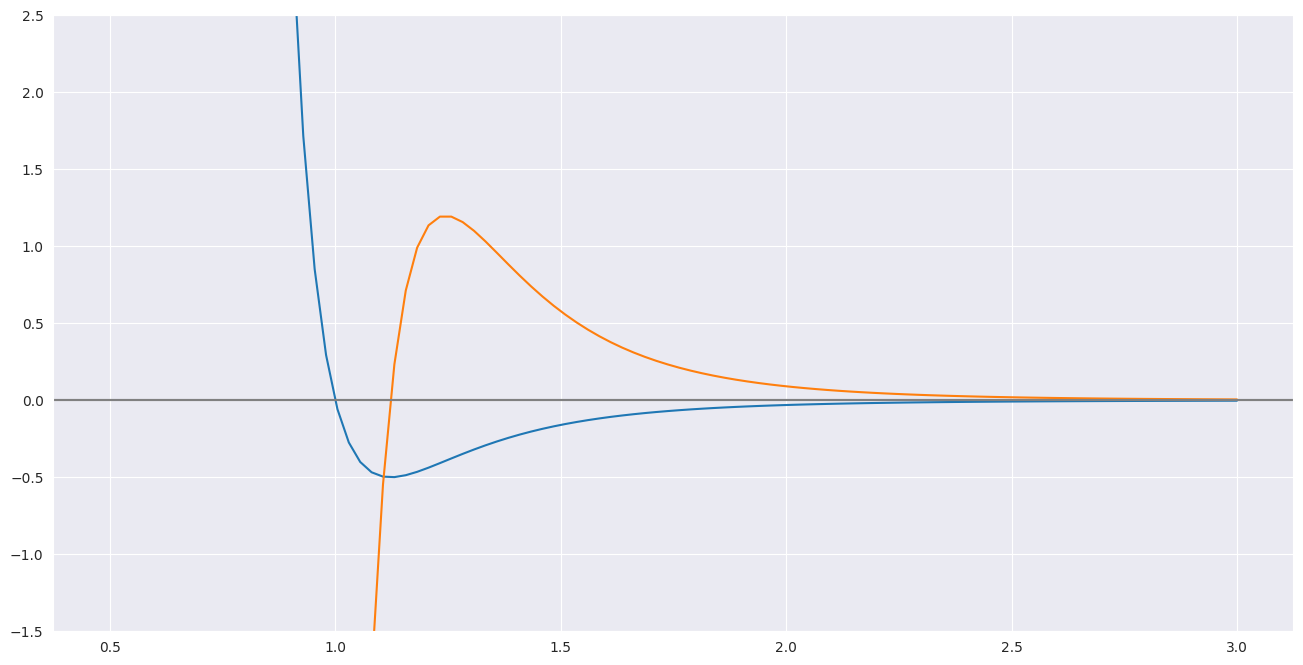

In [5]:
_, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 8))

x = np.linspace(0.5, 3, 100)

sigma = 1
eps = 0.5

y = lennard_jones_potential(x, sigma, eps)
draw_plot_lj(x, y, ax)

y = lennard_jones_force(x, sigma, eps)
draw_plot_lj(x, y, ax)

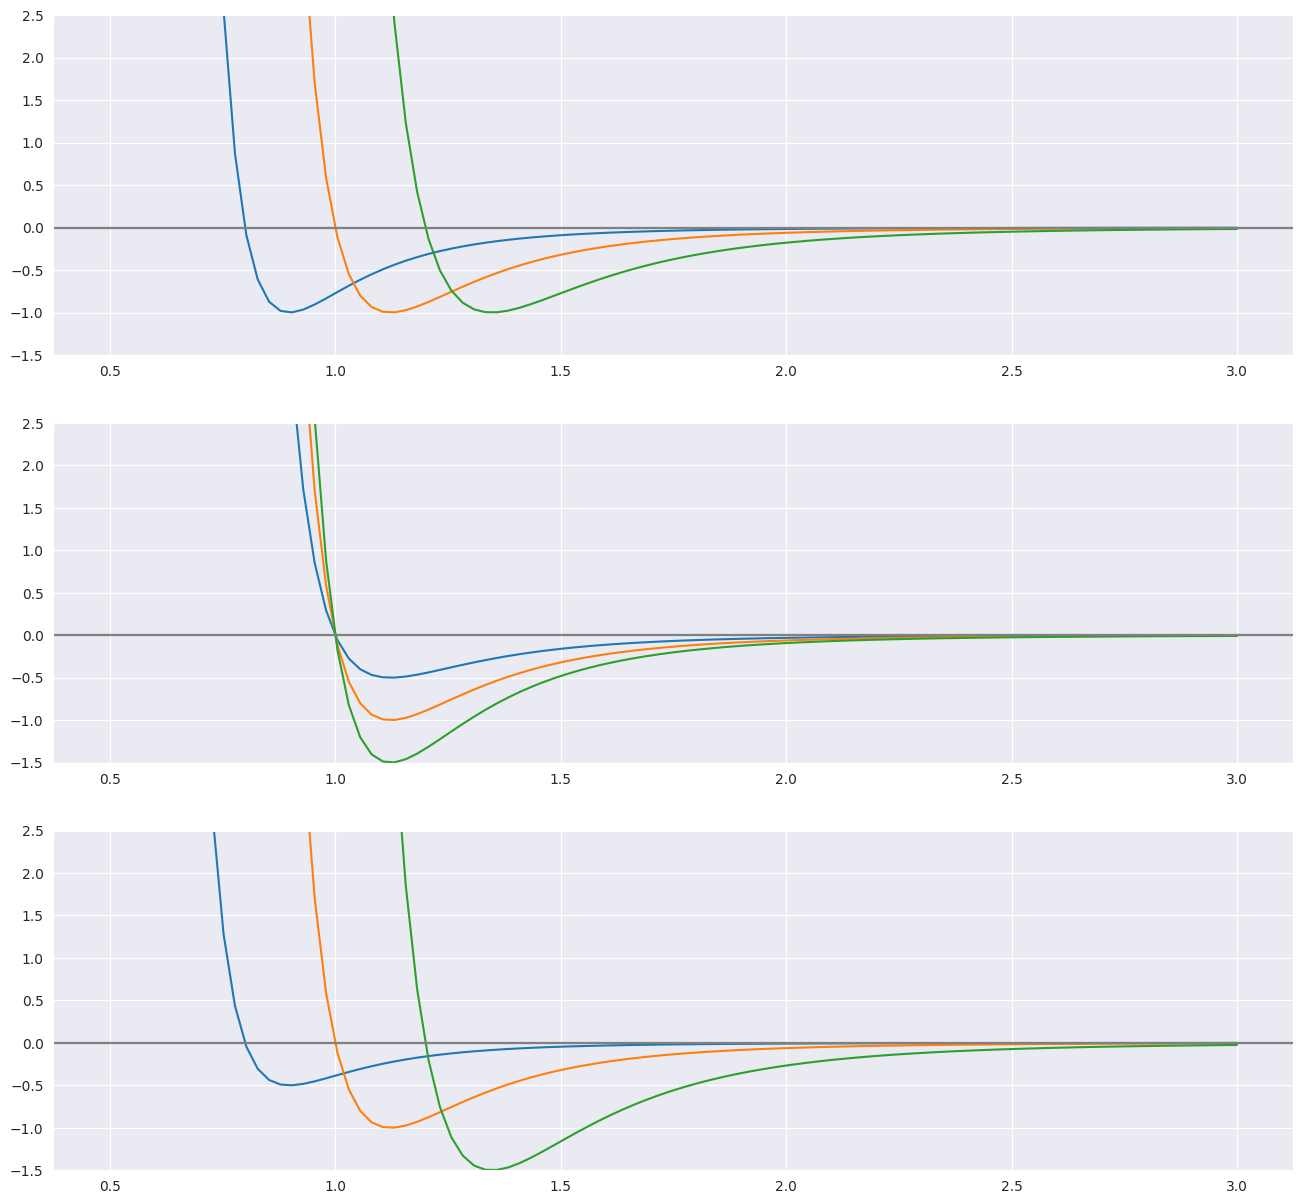

In [6]:
_, axes = plt.subplots(ncols=1, nrows=3, figsize=(16, 15))

x = np.linspace(0.5, 3, 100)

# moving sigma
y = lennard_jones_potential(x, 0.8, 1)
draw_plot_lj(x, y, axes[0])

y = lennard_jones_potential(x, 1, 1)
draw_plot_lj(x, y, axes[0])

y = lennard_jones_potential(x, 1.2, 1)
draw_plot_lj(x, y, axes[0])

# moving epsilon
y = lennard_jones_potential(x, 1, 0.5)
draw_plot_lj(x, y, axes[1])

y = lennard_jones_potential(x, 1, 1)
draw_plot_lj(x, y, axes[1])

y = lennard_jones_potential(x, 1, 1.5)
draw_plot_lj(x, y, axes[1])

# moving sigma and epsilon
y = lennard_jones_potential(x, 0.8, 0.5)
draw_plot_lj(x, y, axes[2])

y = lennard_jones_potential(x, 1, 1)
draw_plot_lj(x, y, axes[2])

y = lennard_jones_potential(x, 1.2, 1.5)
draw_plot_lj(x, y, axes[2])

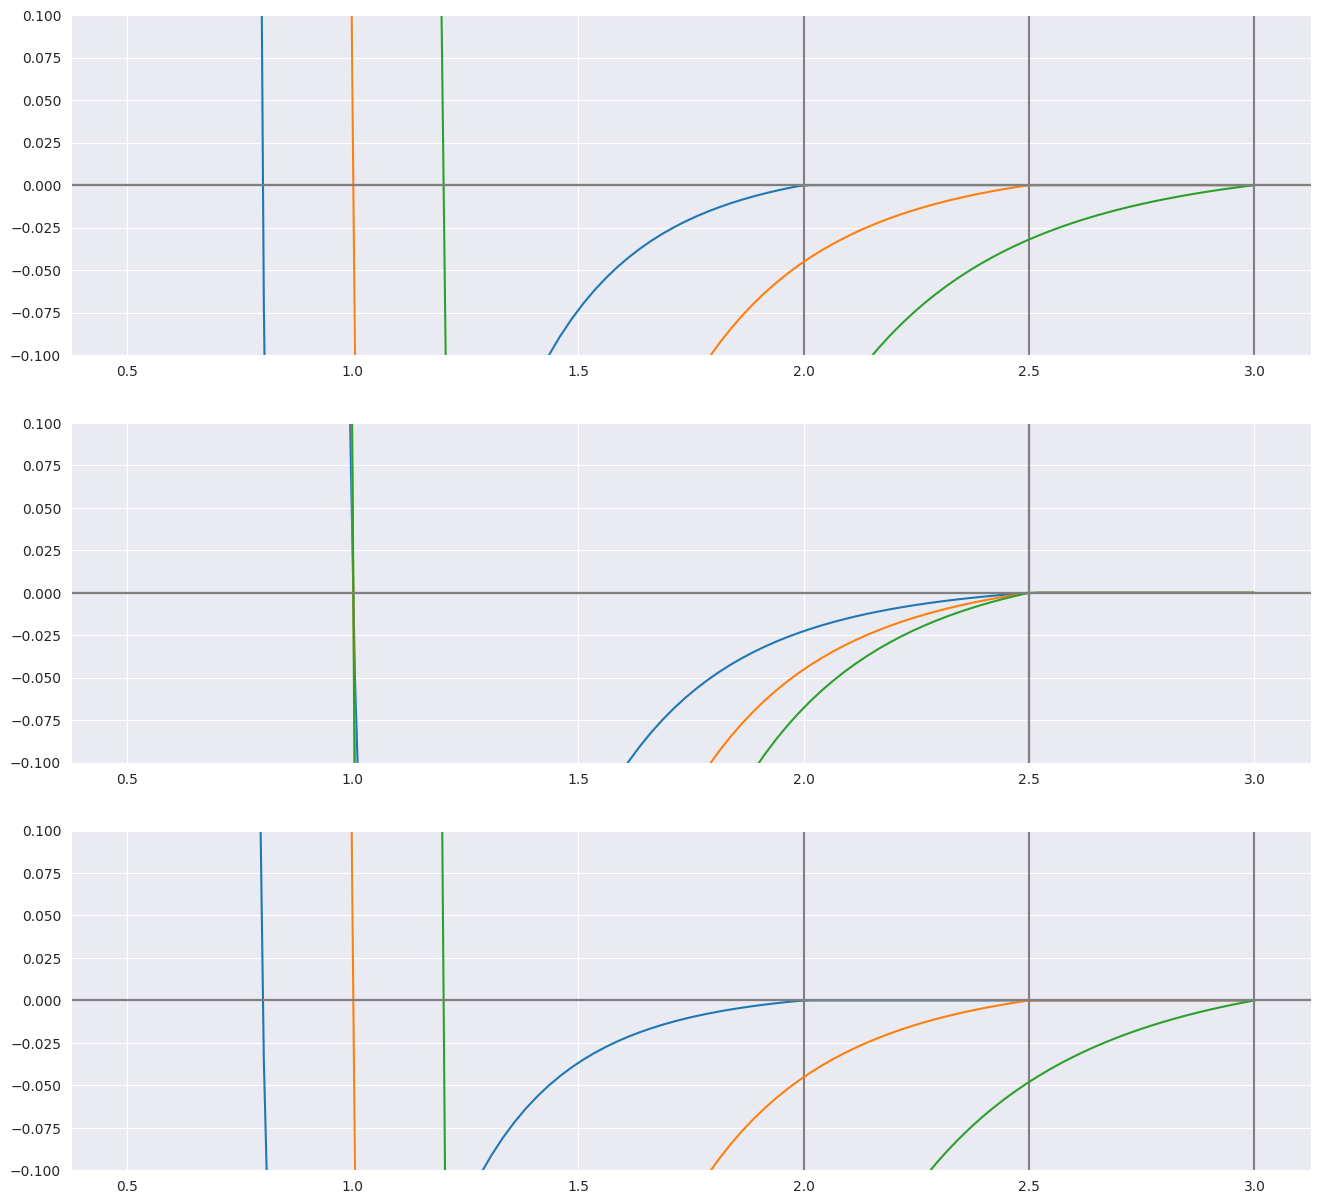

In [7]:
_, axes = plt.subplots(ncols=1, nrows=3, figsize=(16, 15))

x = np.linspace(0.5, 3, 100)

# moving sigma
y = lennard_jones_potential_truncated(x, 0.8, 1)
draw_plot_ljr(x, y, axes[0], 0.8)

y = lennard_jones_potential_truncated(x, 1, 1)
draw_plot_ljr(x, y, axes[0], 1)

y = lennard_jones_potential_truncated(x, 1.2, 1)
draw_plot_ljr(x, y, axes[0], 1.2)

# moving epsilon
y = lennard_jones_potential_truncated(x, 1, 0.5)
draw_plot_ljr(x, y, axes[1], 1)

y = lennard_jones_potential_truncated(x, 1, 1)
draw_plot_ljr(x, y, axes[1], 1)

y = lennard_jones_potential_truncated(x, 1, 1.5)
draw_plot_ljr(x, y, axes[1], 1)

# moving sigma and epsilon
y = lennard_jones_potential_truncated(x, 0.8, 0.5)
draw_plot_ljr(x, y, axes[2], 0.8)

y = lennard_jones_potential_truncated(x, 1, 1)
draw_plot_ljr(x, y, axes[2], 1)

y = lennard_jones_potential_truncated(x, 1.2, 1.5)
draw_plot_ljr(x, y, axes[2], 1.2)

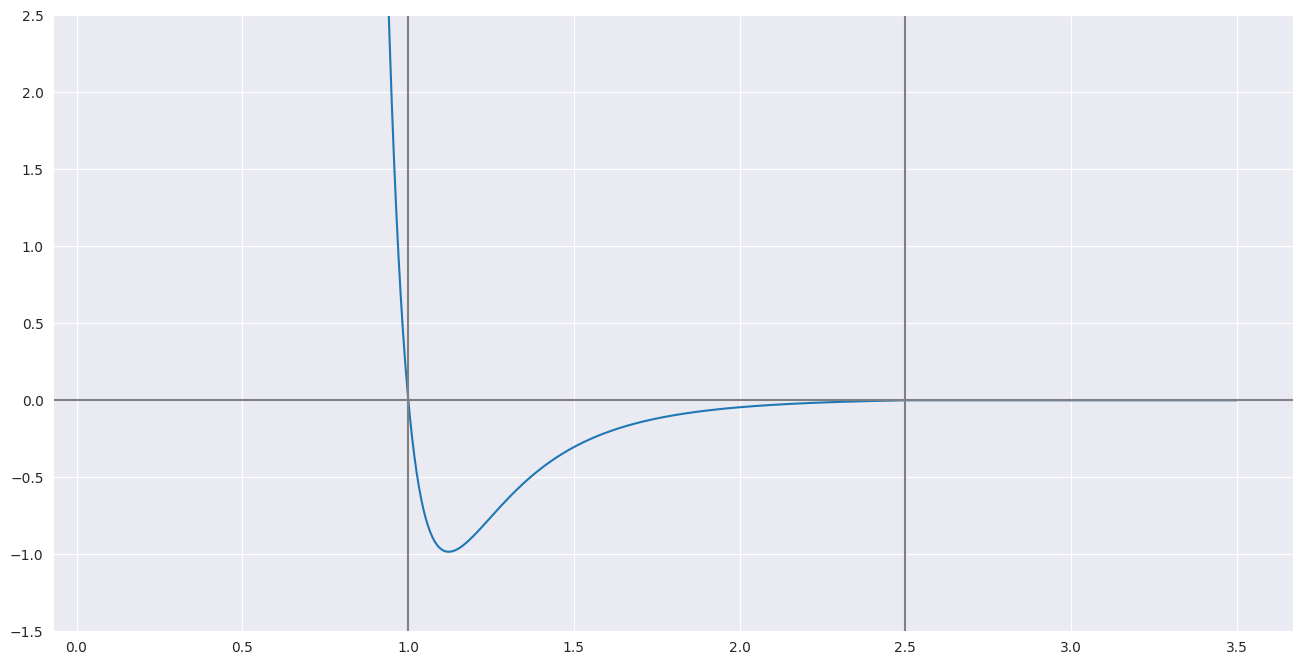

In [8]:
_, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 8))

sigma = 1
eps = 1

x = np.linspace(0.1, 3.5, 1000) / eps
y = lennard_jones_potential_truncated(x, sigma, eps) / sigma

plot = sns.lineplot(
    x=x,
    y=y,
    ax=ax,
)
plot.set_ylim(-1.5, 2.5)
plot.axhline(y=0, color='grey')
plot.axvline(x=2.5*sigma, color='grey')
plot.axvline(x=1, color='grey');

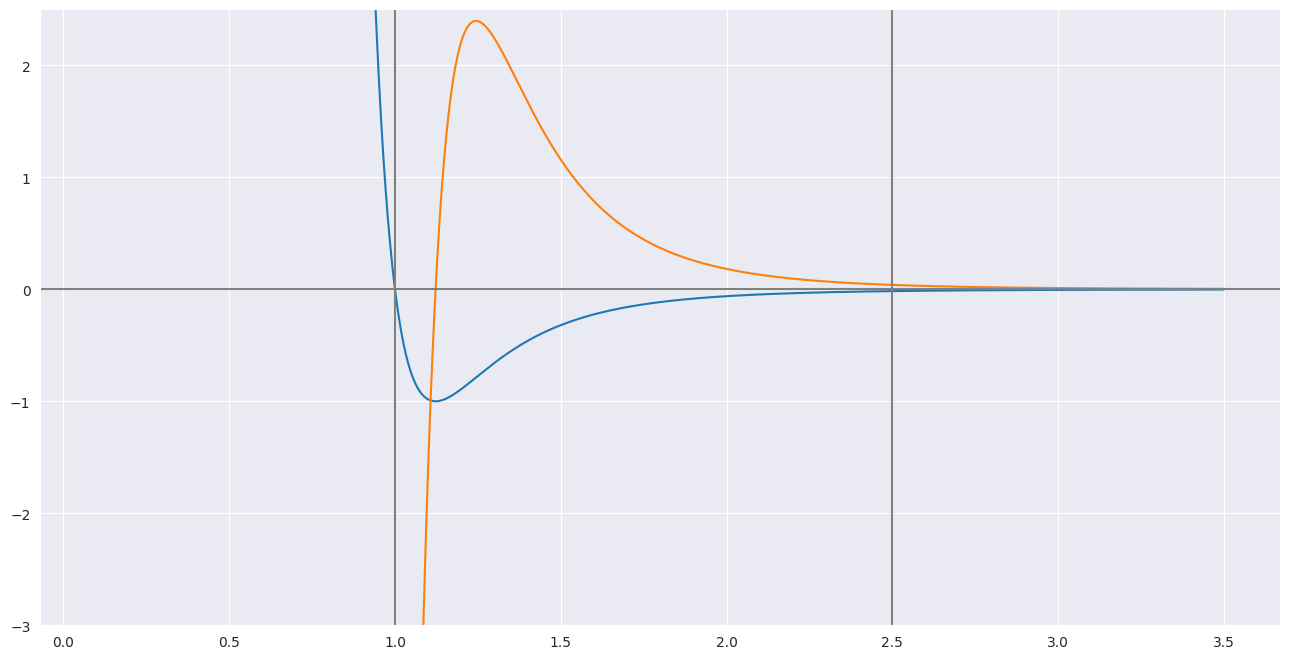

In [9]:
_, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 8))

sigma = 1
eps = 1

x = np.linspace(0.1, 3.5, 1000)
y = lennard_jones_force(x, sigma, eps)

plot = sns.lineplot(
    x=x,
    y=lennard_jones_potential(x, sigma, eps),
    ax=ax,
)

plot = sns.lineplot(
    x=x,
    y=lennard_jones_force(x, sigma, eps),
    ax=ax,
)
plot.set_ylim(-3, 2.5)
plot.axhline(y=0, color='grey')
plot.axvline(x=2.5*sigma, color='grey')
plot.axvline(x=1, color='grey');

In [10]:
def morse_potential(r: np.ndarray, eps: float, alpha: float, sigma: float):
    return eps * (np.exp(-2*alpha * (r - sigma)) - 2*np.exp(-alpha * (r - sigma)))

def morse_force(r: np.ndarray, eps: float, alpha: float, sigma: float):
    return -2*alpha * eps * np.exp(alpha*(sigma-r)) * (np.exp(alpha*(sigma-r)) - 1)

# def morse_potential(r: np.ndarray, alpha: float, de: float, re: float):
#     return de * (1 - np.exp(-alpha*(r-re)))**2

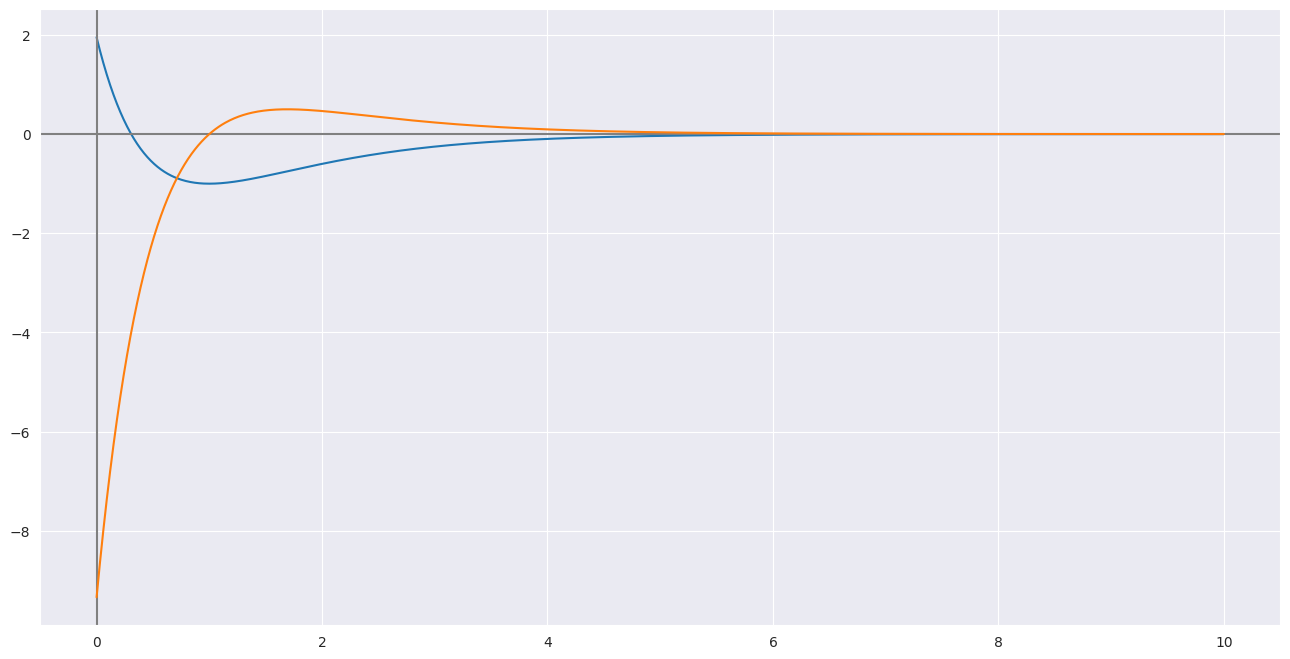

In [11]:
_, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 8))

x = np.linspace(0, 10, 1000)

plot = sns.lineplot(
    x=x,
    y=morse_potential(x, 1, 1, 1),
    ax=ax,
)
plot.axhline(y=0, color='grey')
plot.axvline(x=0, color='grey')

plot = sns.lineplot(
    x=x,
    y=morse_force(x, 1, 1, 1),
    ax=ax,
)

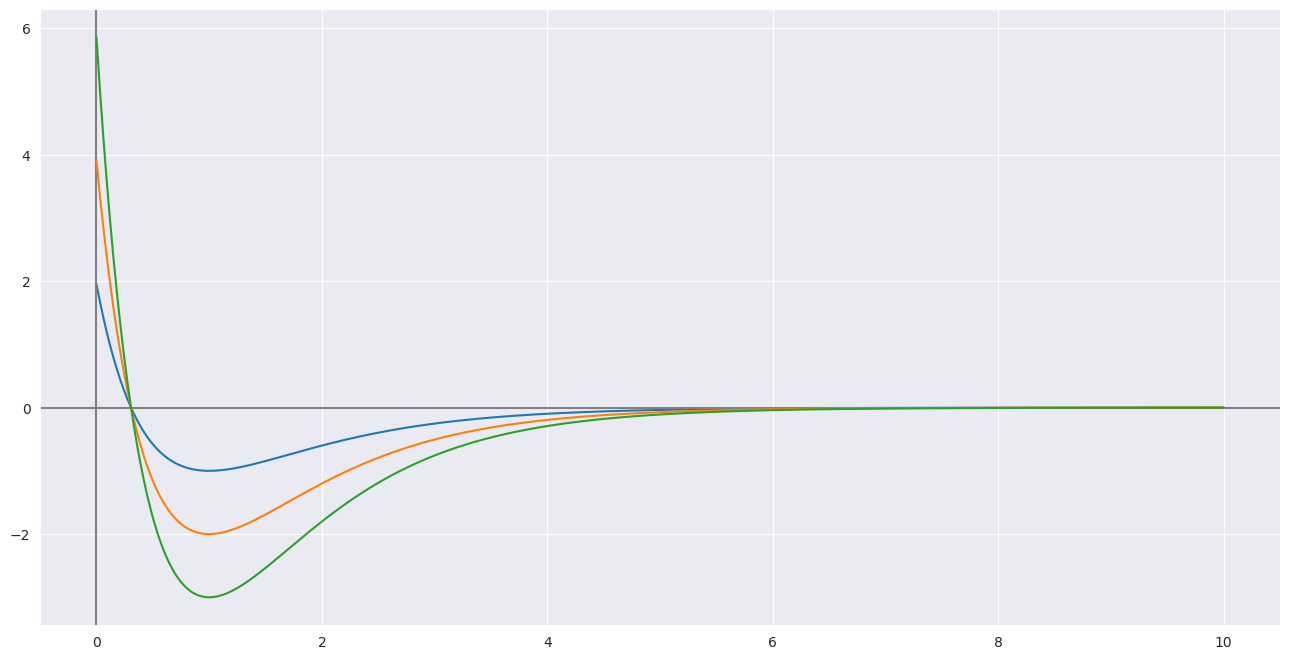

In [32]:
_, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 8))

x = np.linspace(0, 10, 1000)

plot = sns.lineplot(
    x=x,
    y=morse_potential(x, 1, 1, 1),
    ax=ax,
)
plot.axhline(y=0, color='grey')
plot.axvline(x=0, color='grey')

plot = sns.lineplot(
    x=x,
    y=morse_potential(x, 2, 1, 1),
    ax=ax,
)

plot = sns.lineplot(
    x=x,
    y=morse_potential(x, 3, 1, 1),
    ax=ax,
)

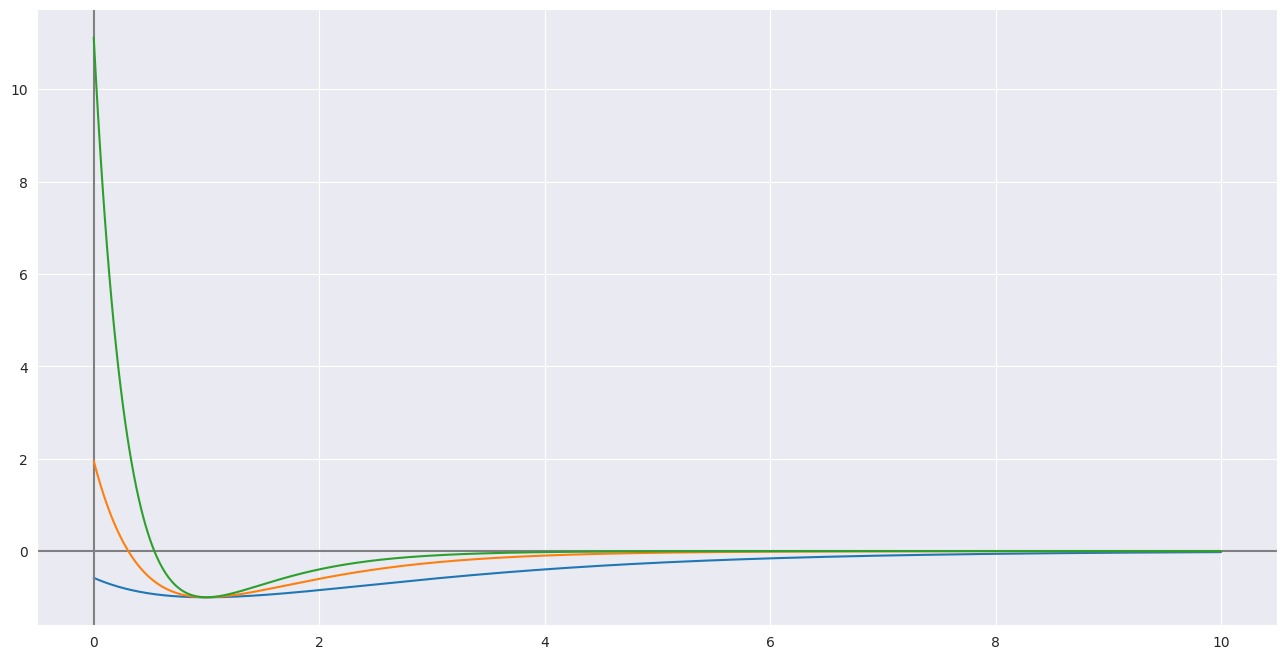

In [31]:
_, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 8))

x = np.linspace(0, 10, 1000)

plot = sns.lineplot(
    x=x,
    y=morse_potential(x, 1, 0.5, 1),
    ax=ax,
)
plot.axhline(y=0, color='grey')
plot.axvline(x=0, color='grey')

plot = sns.lineplot(
    x=x,
    y=morse_potential(x, 1, 1, 1),
    ax=ax,
)

plot = sns.lineplot(
    x=x,
    y=morse_potential(x, 1, 1.5, 1),
    ax=ax,
)

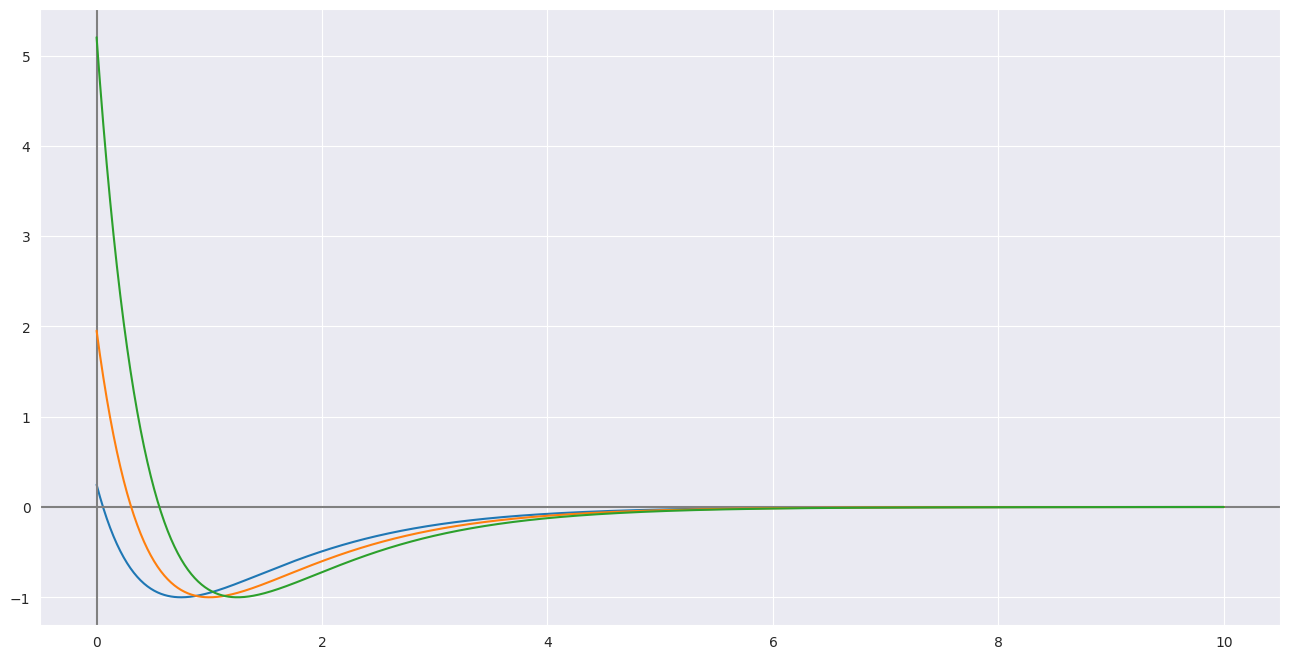

In [30]:
_, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 8))

x = np.linspace(0, 10, 1000)

plot = sns.lineplot(
    x=x,
    y=morse_potential(x, 1, 1, 0.75),
    ax=ax,
)
plot.axhline(y=0, color='grey')
plot.axvline(x=0, color='grey')

plot = sns.lineplot(
    x=x,
    y=morse_potential(x, 1, 1, 1),
    ax=ax,
)

plot = sns.lineplot(
    x=x,
    y=morse_potential(x, 1, 1, 1.25),
    ax=ax,
)